# Sahil Chawla

### Research Question

During the term of this project, I will be conducting an analysis on our dataset to find trends based on gender, race , city or age of the person in the US Police Shooting that have taken place from 2015-2022. The dataset that my team has chosen also contains columns that describe if the person shot was armed or not, fleeing or not, and if they were mentally stable. One of the aspects that I will be trying to mind more about would be the trends in shooting of a person who not mentally stable. 


# Task 1 : Exploratory Data Analysis (EDA) 

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
raw_data = pd.read_csv("../data/US Police shootings in from 2015-22 2.csv")
raw_data.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
5,6,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True
6,7,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,-111.841,33.328,True
7,8,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,-97.564,38.704,True
8,9,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,-91.119,40.809,True
9,10,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,-79.991,40.413,True


#### I used .shape to figure out the number of rows and columns in the dataset.

In [6]:
raw_data.shape

(7729, 17)

#### .column helps in identyfying the major columns of the table

In [9]:
raw_data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

##### With the help of the above function, we know that there are some columns in this dataset which can be removed to make calculations easier.

#### .info helps in finding out the different types on columns of the dataset

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7729 non-null   int64  
 1   name                     7312 non-null   object 
 2   date                     7729 non-null   object 
 3   manner_of_death          7729 non-null   object 
 4   armed                    7520 non-null   object 
 5   age                      7247 non-null   float64
 6   gender                   7709 non-null   object 
 7   race                     6269 non-null   object 
 8   city                     7729 non-null   object 
 9   state                    7729 non-null   object 
 10  signs_of_mental_illness  7729 non-null   bool   
 11  threat_level             7729 non-null   object 
 12  flee                     6854 non-null   object 
 13  body_camera              7729 non-null   bool   
 14  longitude               

### Lets see which demographic according to age is affected most by these shootings

<AxesSubplot:xlabel='age', ylabel='Count'>

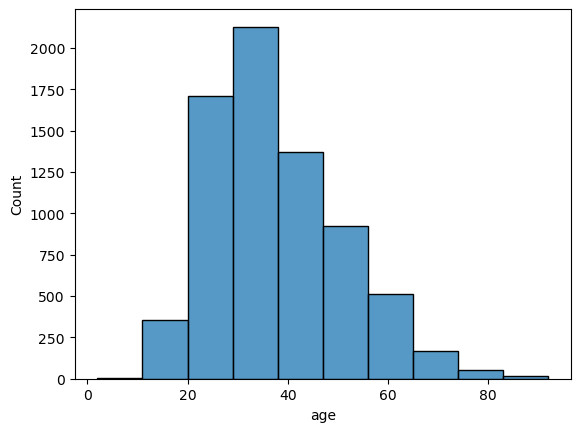

In [26]:
sns.histplot(df.age,bins=10)

### Lets see which demographic according to race is affected most by these shootings

TypeError: 'value' must be an instance of str or bytes, not a float

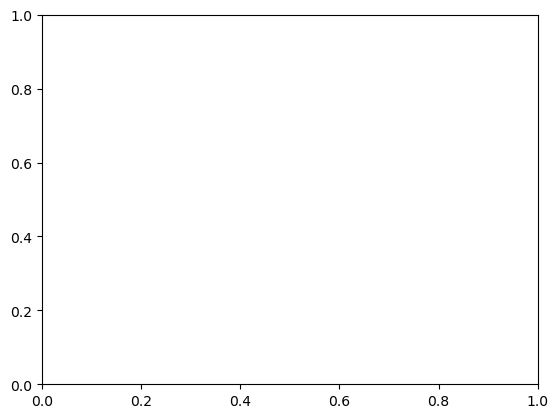

# Task 2: Data Analysis Pipeline

#### Lets see how many null values are there

In [10]:
raw_data.isnull().sum()

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

#### --As we can see there are a lot of null values in the dataset, specially in the race, latitude, and longitude columns

### Lets remove the columns that we will not be needing while performing an analysis on the dataset.

#### --The columns than can be dropped are latitude, longitude, is_geocoding_exact

In [11]:
clean_data = raw_data.drop(['longitude','latitude','is_geocoding_exact'], axis=1)
clean_data.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,6,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,7,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,8,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,9,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,10,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


#### --Lets replace ? with Nan, so we can check out some missing values that could have gone undetected

In [12]:
for col in clean_data.columns:
    clean_data[col].replace({'?':np.nan},inplace=True)

In [13]:
clean_data.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,6,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,7,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,8,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,9,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,10,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


#### After performing the above function and then checking the count on null values, we find out that there are no extra hidden values in the dataset.

In [14]:
clean_data.isnull().sum()

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
dtype: int64

#### Lets visualize the missing values with the help of a heatmap

<AxesSubplot:>

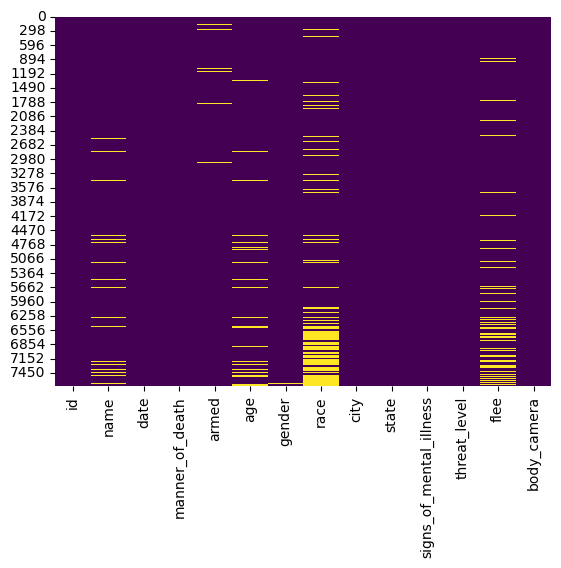

In [16]:
sns.heatmap(clean_data.isnull(),cbar=False,cmap='viridis')

## Task 4

#### There are two plots below, one that compares the threat_level to the count, and the other compares armed to the count.

#### It is very evident from the plots visualized below that the count is highest for someone who was attacking and someone who was armed with a gun.

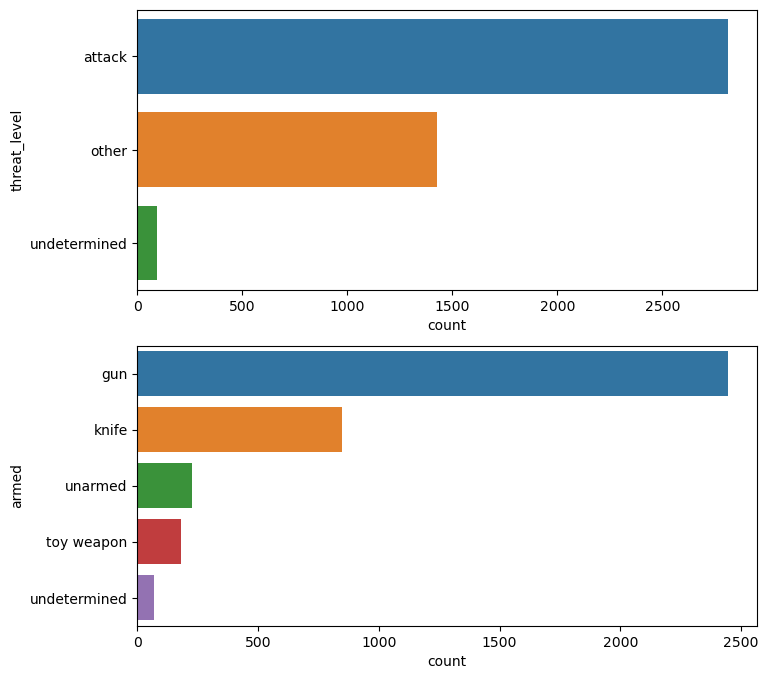

In [19]:
df = pd.read_csv("../data/US Police shootings in from 2015-22 2.csv")
not_fleeing = df[df['flee'] == 'Not fleeing'].copy()

fig, ax = plt.subplots(2,1, figsize=(8,8))

sns.countplot(ax=ax[0], data=not_fleeing, y='threat_level')
sns.countplot(ax=ax[1], data=not_fleeing, y='armed',
              order=not_fleeing.armed.value_counts().iloc[:5].index)

plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

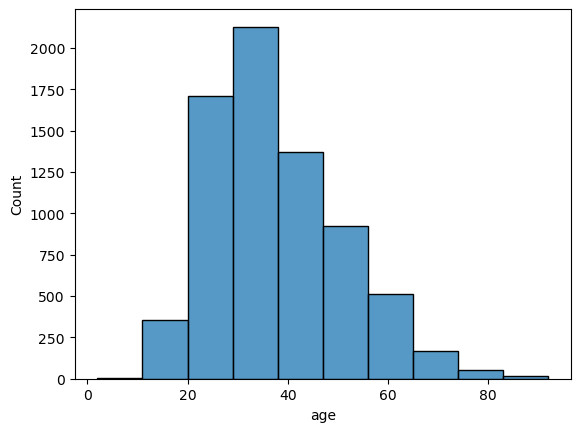

In [25]:
sns.histplot(df.age,bins=10)